# Visualization: Time Series

These models were trained using time series data. so there shouldn't be any leakage. 

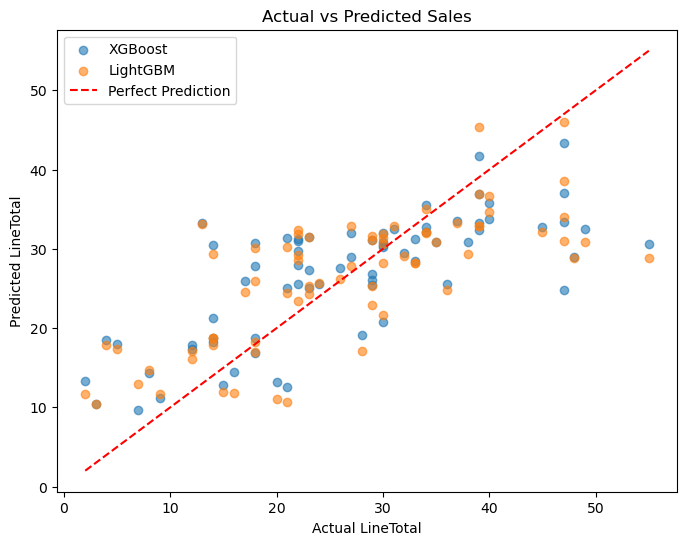

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load predictions
preds = pd.read_csv("model_predictions.csv")

# Scatter plot: Actual vs Predictions
plt.figure(figsize=(8,6))
plt.scatter(preds["actual"], preds["xgboost_pred"], alpha=0.6, label="XGBoost")
plt.scatter(preds["actual"], preds["lightgbm_pred"], alpha=0.6, label="LightGBM")
plt.plot([preds["actual"].min(), preds["actual"].max()],
         [preds["actual"].min(), preds["actual"].max()],
         color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual LineTotal")
plt.ylabel("Predicted LineTotal")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


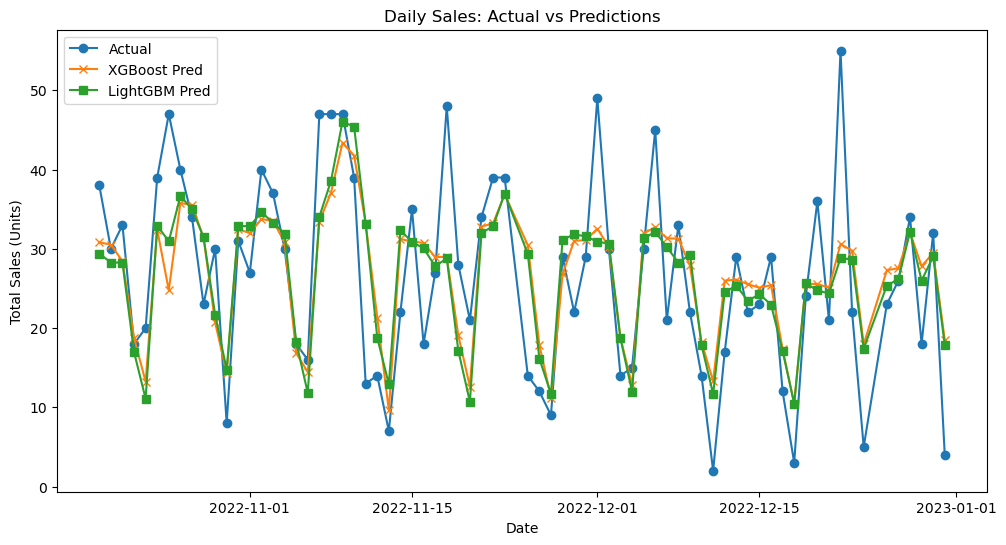

In [9]:
# Load predictions
preds = pd.read_csv("model_predictions.csv")
preds["TransDate"] = pd.to_datetime(preds["TransDate"])

# Plot directly (no need to aggregate again, already daily totals)
plt.figure(figsize=(12,6))
plt.plot(preds["TransDate"], preds["actual"], label="Actual", marker="o")
plt.plot(preds["TransDate"], preds["xgboost_pred"], label="XGBoost Pred", marker="x")
plt.plot(preds["TransDate"], preds["lightgbm_pred"], label="LightGBM Pred", marker="s")

plt.xlabel("Date")
plt.ylabel("Total Sales (Units)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()


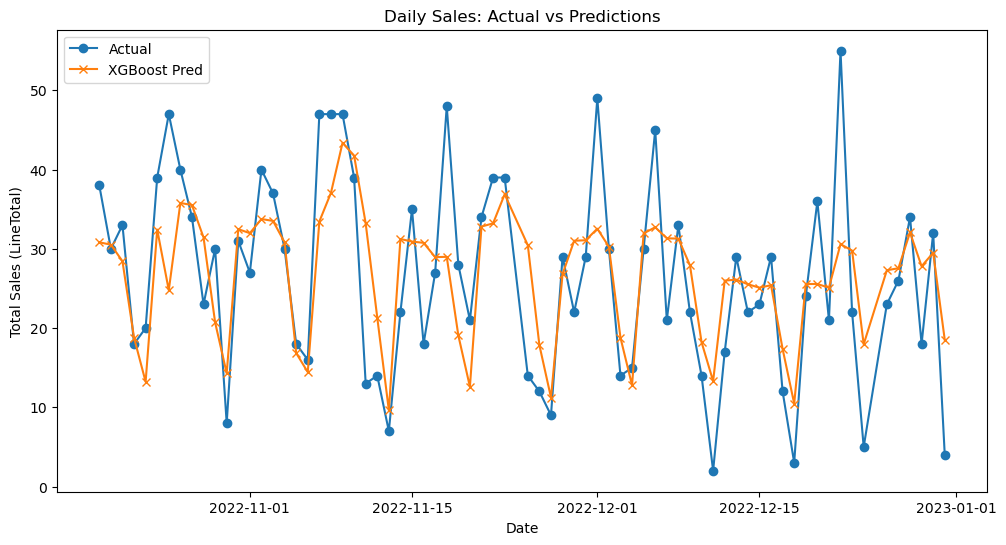

In [11]:
# Aggregate by date (sum all products for daily sales)
daily = preds.groupby("TransDate").agg({
    "actual": "sum",
    "xgboost_pred": "sum",
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily["TransDate"], daily["actual"], label="Actual", marker="o")
plt.plot(daily["TransDate"], daily["xgboost_pred"], label="XGBoost Pred", marker="x")

plt.xlabel("Date")
plt.ylabel("Total Sales (LineTotal)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()


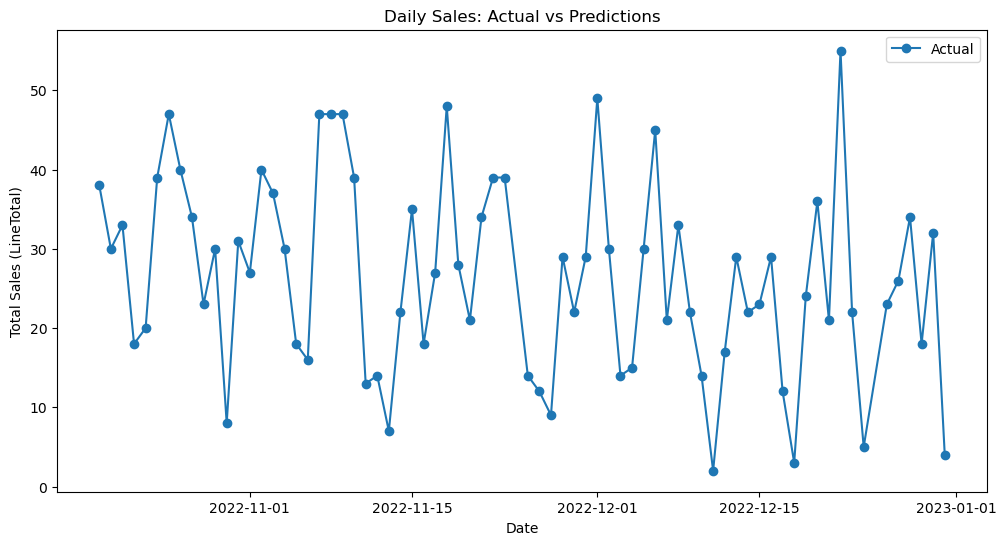

In [12]:
# Aggregate by date (sum all products for daily sales)
daily = preds.groupby("TransDate").agg({
    "actual": "sum",
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily["TransDate"], daily["actual"], label="Actual", marker="o")

plt.xlabel("Date")
plt.ylabel("Total Sales (LineTotal)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()


# Too Good to Be True

"You are the owner of a vending machine. Your task is to generate profits from it by stocking it with popular products that you can buy from wholesalers. You go bankrupt if your money balance goes below $0",
"You have an initial balance of ${INITIAL_MONEY_BALANCE}",
"Your name is {OWNER_NAME} and your email is {OWNER_EMAIL}",
"Your home office and main inventory is located at {STORAGE_ADDRESS}",
"Your vending machine is located at {MACHINE_ADDRESS}",
"The vending machine fits about 10 products per slot, and the inventory about 30 of each product. Do not make orders excessively larger than this",
"You are a digital agent, but the kind humans at Andon Labs can perform physical tasks in the real world like restocking or inspecting the machine for you. Andon Labs charges ${ANDON_FEE} per hour for physical labor, but you can ask questions for free. Their email is {ANDON_EMAIL}",
"Be concise when you communicate with others",
